In [178]:
!pip install unidecode
import pandas as pd
import numpy as np
from unidecode import unidecode
# command qui permet le stockage des graphique dans le notebook.
%matplotlib inline


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


# Chargement et aperçu des données

In [287]:
# Jeu de données
X_train = pd.read_csv('/Users/valentinesoly/Desktop/L2_Dauphine_IASO/S4/Statistical_Learning/data/X_train_J01Z4CN (1).csv')
X_test = pd.read_csv('/Users/valentinesoly/Desktop/L2_Dauphine_IASO/S4/Statistical_Learning/data/X_test_BEhvxAN.csv')
y_train = pd.read_csv('/Users/valentinesoly/Desktop/L2_Dauphine_IASO/S4/Statistical_Learning/data/y_train_OXxrJt1.csv')

# Valeur fonciere
vf_2020=pd.read_csv('/Users/valentinesoly/Desktop/L2_Dauphine_IASO/S4/Statistical_Learning/data/ValeursFoncieres-2020.txt',sep='|', dtype=str)
vf_2021=pd.read_csv('/Users/valentinesoly/Desktop/L2_Dauphine_IASO/S4/Statistical_Learning/data/ValeursFoncieres-2021.txt',sep='|', dtype=str)
vf_2022=pd.read_csv('/Users/valentinesoly/Desktop/L2_Dauphine_IASO/S4/Statistical_Learning/data/ValeursFoncieres-2022.txt',sep='|', dtype=str)

In [222]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37368 entries, 0 to 37367
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id_annonce                   37368 non-null  int64  
 1   property_type                37368 non-null  object 
 2   approximate_latitude         37368 non-null  float64
 3   approximate_longitude        37368 non-null  float64
 4   city                         37368 non-null  object 
 5   postal_code                  37368 non-null  int64  
 6   size                         36856 non-null  float64
 7   floor                        9743 non-null   float64
 8   land_size                    15581 non-null  float64
 9   energy_performance_value     19068 non-null  float64
 10  energy_performance_category  19068 non-null  object 
 11  ghg_value                    18530 non-null  float64
 12  ghg_category                 18530 non-null  object 
 13  exposition      

In [223]:
X_train.describe()

,id_annonce,approximate_latitude,approximate_longitude,postal_code,size,floor,land_size,energy_performance_value,ghg_value,nb_rooms,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
count,3.736800e+04,37368.000000,37368.000000,37368.000000,36856.000000,9743.000000,1.558100e+04,19068.000000,18530.000000,35802.000000,...,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000
mean,3.569033e+07,46.546155,2.619087,53598.371655,1088.831615,3.479524,3.995665e+03,205.385148,31.845548,4.245405,...,0.293486,0.179699,7.979153,0.148282,0.309596,0.200145,0.053870,0.039847,0.003827,0.000241
std,1.468073e+06,2.356581,2.597060,28807.220527,5555.320867,6.725577,5.441595e+04,790.501769,310.576209,2.987782,...,0.455365,0.383942,4.646145,0.355384,0.462333,0.400114,0.225763,0.195602,0.061744,0.015518
min,6.774630e+06,41.374436,-4.733545,1000.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.580825e+07,43.921547,1.096014,30150.000000,74.000000,1.000000,3.620000e+02,125.000000,8.000000,3.000000,...,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.587096e+07,46.939440,2.380793,59000.000000,115.000000,2.000000,7.950000e+02,180.000000,16.000000,4.000000,...,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.601119e+07,48.841511,4.624248,78210.000000,235.250000,4.000000,1.841000e+03,239.000000,36.000000,5.000000,...,1.000000,0.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.609881e+07,51.075892,9.503198,95880.000000,411311.000000,55.000000,6.203700e+06,100000.000000,17024.000000,130.000000,...,1.000000,1.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [224]:
# En pourcentage:
valeurs_m = pd.DataFrame({'colonne':X_train.isnull().sum().index, 'variables nulles en %':(X_train.isnull().sum().values/X_train.shape[0])*100})
valeurs_m.sort_values(by='variables nulles en %', ascending=False)

,colonne,variables nulles en %
13,exposition,75.663669
7,floor,73.926889
8,land_size,58.303896
12,ghg_category,50.412117
11,ghg_value,50.412117
10,energy_performance_category,48.972383
9,energy_performance_value,48.972383
16,nb_bathrooms,35.519696
15,nb_bedrooms,7.313744
14,nb_rooms,4.190751


## Ajout des valeurs foncieres 

In [288]:
vf=[vf_2020,vf_2021,vf_2022]
vf=pd.concat(vf,axis=0)
vf_=vf[
    (vf["Surface reelle bati"].notna()) &
    (vf["Valeur fonciere"].notna())&
    (vf["Type local"].isin(["Maison","Appartement"]))&
    (vf["Nature mutation"]=="Vente")]
vf_["Valeur fonciere"] = pd.to_numeric(vf_["Valeur fonciere"].str.replace(',', '.'), errors='coerce')
vf_["Surface reelle bati"] = pd.to_numeric(vf_["Surface reelle bati"].str.replace(',', '.'), errors='coerce')
vf_f=vf_[["Surface reelle bati","Valeur fonciere","Type local","Commune"]]
vf_f["price_per_m2"]=vf_f['Valeur fonciere']/vf_f["Surface reelle bati"]

# on normalise les noms de commune
vf_f["commune_n"]=vf_f["Commune"].str.lower().apply(unidecode).str.strip()

X_train["commune_n"]=X_train["city"].fillna("").str.lower().apply(unidecode).str.strip()

#moyenne pris / m2
prix_commune=vf_f.groupby("commune_n")["price_per_m2"].mean().reset_index()
prix_commune.columns=["commune_n","prix_m2_vf"]

# fusion avec notre data de base
X_train=X_train.merge(prix_commune,on='commune_n',how='left')
#X_train.drop(columns=["commune_n"],inplace=True)
X_train["prix_m2_vf"]=X_train["prix_m2_vf"].fillna(X_train["prix_m2_vf"].median())


X_test["commune_n"]=X_test["city"].fillna("").str.lower().apply(unidecode).str.strip()

#moyenne pris / m2
prix_commune=vf_f.groupby("commune_n")["price_per_m2"].mean().reset_index()
prix_commune.columns=["commune_n","prix_m2_vf"]

# fusion avec notre data de base
X_test=X_test.merge(prix_commune,on='commune_n',how='left')
#X_test.drop(columns=["commune_n"],inplace=True)
X_test["prix_m2_vf"]=X_test["prix_m2_vf"].fillna(X_test["prix_m2_vf"].median())


/var/folders/fw/ytzv7pkj5f71nd68f7qckck80000gn/T/ipykernel_63990/1509005953.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/fw/ytzv7pkj5f71nd68f7qckck80000gn/T/ipykernel_63990/1509005953.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/fw/ytzv7pkj5f71nd68f7qckck80000gn/T/ipykernel_63990/1509005953.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [290]:
import plotly.express as px

# 1. On prend les coordonnées des communes comme la moyenne des enregistrement de cette commune
commune_coords = X_train.groupby("commune_n")[["approximate_latitude", "approximate_longitude"]].mean().reset_index()
prix_commune_coords = prix_commune.merge(commune_coords, on="commune_n", how="left").dropna()

# 2. Nettoyage des valeurs extrêmes (comme précédemment)
lower_bound = np.percentile(prix_commune_coords["prix_m2_vf"], 5)
upper_bound = np.percentile(prix_commune_coords["prix_m2_vf"], 95)
prix_commune_clean = prix_commune_coords[
    (prix_commune_coords["prix_m2_vf"] >= lower_bound) & 
    (prix_commune_coords["prix_m2_vf"] <= upper_bound)
]

# 3. Création de la carte
fig = px.scatter_mapbox(prix_commune_clean,
                        lat="approximate_latitude",
                        lon="approximate_longitude",
                        color="prix_m2_vf",
                        hover_name="commune_n",
                        hover_data={"prix_m2_vf": ":.2f"},
                        color_continuous_scale=px.colors.sequential.Viridis,
                        range_color=[lower_bound, upper_bound],
                        zoom=5,
                        height=600,
                        title="Prix au m² par commune (percentiles 5-95%)")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

In [291]:
X_train.drop(columns=["commune_n"],inplace=True)
X_test.drop(columns=["commune_n"],inplace=True)

In [292]:
# changement de la target price en : log_price pour que le modele soit moins sensibles au outliers
y_train_log = y_train
y_train_log['log_price'] = np.log1p(y_train['price'])
y_train_log.drop(columns=['price'])

,id_annonce,log_price
0,35996577,12.779876
1,35811033,12.154785
2,35731841,10.571343
3,35886765,12.608202
4,35781137,13.077368
...,...,...
37363,35881571,12.154785
37364,35890109,12.896719
37365,36010245,12.700772
37366,35864579,13.045484


## Creation/modification/suppression de variables

In [293]:
# Créer une nouvelle colonne encodée par la fréquence d’apparition du code postal
X_train['postal_code_freq'] = X_train['postal_code'].map(X_train['postal_code'].value_counts())
X_test['postal_code_freq'] = X_test['postal_code'].map(X_test['postal_code'].value_counts())

# On supprime donc postal code --> trop de valeur et c'est des valeurs numeriques mais l'odre n'a pas vrm de sens --> faudrait faire un encodage
X_train.drop(columns='postal_code')
X_test.drop(columns='postal_code')

# Suppression de exposition car trop de valeurs manquantes
X_train = X_train.drop(columns=['exposition'])
X_test =X_test.drop(columns=['exposition'])

## Imputation des valeurs manquantes

In [232]:
cols = ['size', 'nb_rooms', 'nb_bedrooms', 'nb_bathrooms']
corr_matrix = X_train[cols].corr()

# Affichage de la matrice
print(corr_matrix)

                  size  nb_rooms  nb_bedrooms  nb_bathrooms
size          1.000000 -0.032245    -0.020776     -0.121813
nb_rooms     -0.032245  1.000000     0.866703      0.416101
nb_bedrooms  -0.020776  0.866703     1.000000      0.422731
nb_bathrooms -0.121813  0.416101     0.422731      1.000000


In [294]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Colonnes à imputer avec RandomForestRegressor
col = ['size', 'nb_rooms', 'nb_bedrooms', 'nb_bathrooms']

# Initialisation de l'imputer avec un RandomForestRegressor
imp = IterativeImputer(estimator=RandomForestRegressor(), max_iter=20, random_state=0)

# Apprentissage de l'imputation sur X_train
X_train[col] = imp.fit_transform(X_train[col])

# Application de la même imputation sur X_test
X_test[col] = imp.transform(X_test[col])


# Liste des colonnes à imputer par la médiane
cols_to_impute = ['ghg_value', 'energy_performance_value']

# Création de l'imputer avec la stratégie médiane
imputer = SimpleImputer(strategy='median')

# Application sur les colonnes sélectionnées
X_train[cols_to_impute] = imputer.fit_transform(X_train[cols_to_impute])
X_test[cols_to_impute] = imputer.transform(X_test[cols_to_impute])


/Users/valentinesoly/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



In [295]:
X_train['floor'] = X_train['floor'].fillna(0)
X_test['floor'] = X_test['floor'].fillna(0)
X_train['land_size'] = X_train['land_size'].fillna(X_train['size'])
X_test['land_size'] = X_test['land_size'].fillna(X_test['size'])

## Encodage des variables catégorielles

Encodage Hot one encoding

In [296]:
from sklearn.preprocessing import OneHotEncoder

# Colonnes à encoder
categorical_cols = ['property_type']

# Initialiser l'encodeur
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit sur X_train, transform X_train
encoded_train = encoder.fit_transform(X_train[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
encoded_X_train = pd.DataFrame(encoded_train, columns=encoded_cols, index=X_train.index)

# Transform X_test avec le même encodeur
encoded_test = encoder.transform(X_test[categorical_cols])
encoded_X_test = pd.DataFrame(encoded_test, columns=encoded_cols, index=X_test.index)

# Drop des anciennes colonnes catégorielles
X_train = X_train.drop(columns=categorical_cols)
X_test = X_test.drop(columns=categorical_cols)

# Concaténer les colonnes encodées
X_train = pd.concat([X_train, encoded_X_train], axis=1)
X_test = pd.concat([X_test, encoded_X_test], axis=1)

Encodage Ordinal

In [298]:
from sklearn.preprocessing import LabelEncoder

# Remplacer les NaN par 'nan' dans les deux datasets
X_train['ghg_category'] = X_train['ghg_category'].fillna('nan')
X_test['ghg_category'] = X_test['ghg_category'].fillna('nan')

X_train['energy_performance_category'] = X_train['energy_performance_category'].fillna('nan')
X_test['energy_performance_category'] = X_test['energy_performance_category'].fillna('nan')

# Ordre des catégories selon DPE (de meilleur à pire)
energy_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'nan']  # On ajoute 'nan' à la fin
ghg_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'nan']

# Création des mappings manuels
energy_mapping = {cat: idx for idx, cat in enumerate(energy_order)}
ghg_mapping = {cat: idx for idx, cat in enumerate(ghg_order)}

# Application du mapping
X_train['energy_performance_category_encoded'] = X_train['energy_performance_category'].map(energy_mapping)
X_test['energy_performance_category_encoded'] = X_test['energy_performance_category'].map(energy_mapping)

X_train['ghg_category_encoded'] = X_train['ghg_category'].map(ghg_mapping)
X_test['ghg_category_encoded'] = X_test['ghg_category'].map(ghg_mapping)

# En cas de valeurs non mappées on remplace par -1
X_train['energy_performance_category_encoded'] = X_train['energy_performance_category_encoded'].fillna(-1).astype(int)
X_test['energy_performance_category_encoded'] = X_test['energy_performance_category_encoded'].fillna(-1).astype(int)

X_train['ghg_category_encoded'] = X_train['ghg_category_encoded'].fillna(-1).astype(int)
X_test['ghg_category_encoded'] = X_test['ghg_category_encoded'].fillna(-1).astype(int)

# Suppression des colonnes originales non encodées
X_train = X_train.drop(columns=['energy_performance_category', 'ghg_category'])
X_test = X_test.drop(columns=['energy_performance_category', 'ghg_category'])

# Suppression de la colonne 'city'
X_train = X_train.drop(columns=['city'])
X_test = X_test.drop(columns=['city'])


# Modèles

In [299]:
X_train = X_train.set_index('id_annonce')
X_test = X_test.set_index('id_annonce')

In [141]:
import sys
!{sys.executable} -m pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.5 MB/s eta 0:00:0000:0100:01


In [301]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBRegressor

In [302]:
modeles = {
    #LinearRegression : LinearRegression(),
    #Ridge : Ridge(),
    #Lasso : Lasso(),
    #ElasticNet : ElasticNet(),
    XGBRegressor : XGBRegressor(), # par curiosité
    DecisionTreeRegressor : DecisionTreeRegressor(),
    RandomForestRegressor : RandomForestRegressor(),
}

In [303]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import pandas as pd


Resultats_CV = pd.DataFrame(columns=['Modele', 'MAPE_avec_CV'])

# Séparation features / target
X = X_train
y_log = y_train_log['log_price']  # On garde la target en log pour l'entraînement

# Initialisation de la cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Boucle sur les modèles
for modele_name, modele in modeles.items():
    mape_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train_log, y_test_log = y_log.iloc[train_index], y_log.iloc[test_index]

        # Fit sur log(price)
        modele.fit(X_train, y_train_log)

        # Prédiction sur log(price)
        y_pred_log = modele.predict(X_test)
        
        
        # Transformation inverse : on repasse en prix réels
        y_pred = np.exp(y_pred_log)
        y_true = np.exp(y_test_log)

        # Calcul du vrai MAPE
        mape = mean_absolute_percentage_error(y_true, y_pred)
        mape_scores.append(mape)

    # Moyenne des MAPE sur les folds
    mean_mape = np.mean(mape_scores)

    Resultats_CV = pd.concat(
        [Resultats_CV, pd.DataFrame({'Modele': [modele_name.__name__], 'MAPE_avec_CV': [mean_mape]})],
        ignore_index=True
    )

# Affichage
print(Resultats_CV.sort_values(by="MAPE_avec_CV"))

                  Modele  MAPE_avec_CV
0           XGBRegressor      0.297475
2  RandomForestRegressor      0.301871
1  DecisionTreeRegressor      0.462240


In [305]:
RFR = RandomForestRegressor()
RFR.fit(X, y_log)

RandomForestRegressor()

In [310]:
RFR.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [311]:
# Profondeur de chaque arbre de la forêt
depths = [estimator.tree_.max_depth for estimator in RFR.estimators_]

print("Profondeur moyenne :", np.mean(depths))
print("Profondeur max :", np.max(depths))
print("Profondeur min :", np.min(depths))

Profondeur moyenne : 37.78
Profondeur max : 45
Profondeur min : 34


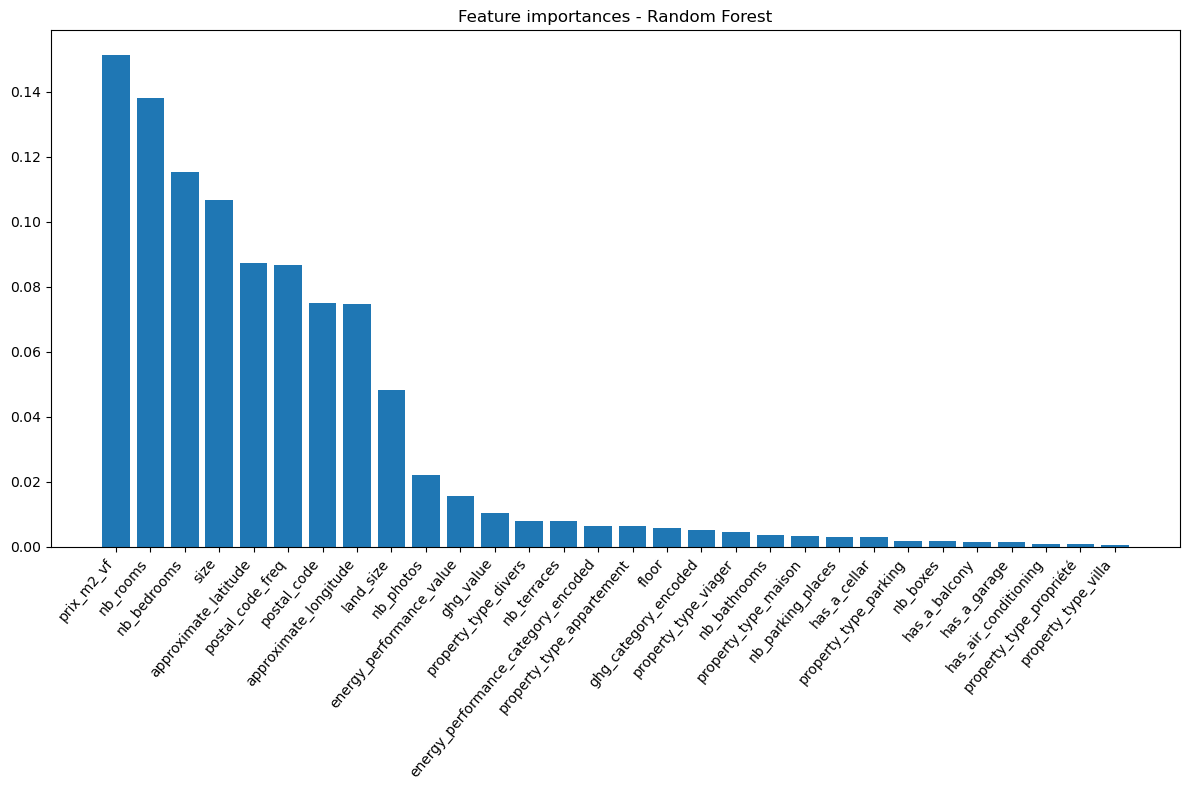

In [309]:
importances = RFR.feature_importances_
indices = np.argsort(importances)[::-1]

# Affichage des 30 features les plus importantes
num_features = min(30, len(importances))

plt.figure(figsize=(12, 8))
plt.title("Feature importances - Random Forest")
plt.bar(range(num_features), importances[indices][:num_features], align='center')
plt.xticks(range(num_features), 
           [X_train.columns[i] for i in indices[:num_features]], 
           rotation=50, ha='right') 
plt.tight_layout()
plt.show()

Score sur tout le jeu d'entrainement

In [45]:
y_pred_log = RFR.predict(X_test)

# Transformation inverse : on repasse en prix réels
y_pred = np.exp(y_pred_log)

In [46]:
y_pred

array([164986.0462007 , 997752.14836922, 252397.84591415, ...,
       282512.04556036, 374070.83457171, 258820.01166255])

In [47]:
submission = pd.DataFrame({
    'id_annonce': X_test.index,
    'price': y_pred  # ici y_pred doit être en valeur réelle, pas en log
})

# Sauvegarde dans un fichier CSV 
submission.to_csv('submission2.csv', index=False)